### 📊 Matriz de covarianza

### 1️⃣ Diferencia entre correlación y covarianza
* Correlación
	* Mide la relación lineal entre dos activos.
	* Su valor siempre está entre -1 y 1.
	* Es adimensional (no depende de las unidades de medida).
	* Ejemplo: 0.85 significa que tienden a moverse en la misma dirección.
*	Covarianza
	* Mide cómo varían conjuntamente dos activos.
	* No está acotada (puede ser cualquier número positivo o negativo).
	* Depende de las unidades de los activos (si los precios cambian de escala, la covarianza también).
	* Ejemplo: 0.002 indica que ambos activos tienden a subir o bajar juntos, pero en magnitud no comparable con otro par.



### 2️⃣ Uso en optimización de portafolios
* 	La matriz de covarianza es la base para calcular la varianza del portafolio:

$$ \sigma_p^2 = w^T \Sigma w $$

donde:
* w = vector de pesos del portafolio.
* $\Sigma = matriz$ de covarianzas.
* Un gestor de portafolios busca combinaciones de activos con baja covarianza para reducir la volatilidad total manteniendo el rendimiento esperado.



### 📌 Ejemplo en Python


[*********************100%***********************]  5 of 5 completed


📊 Matriz de Covarianza:
Ticker      AAPL       IEF       JNJ      MSFT       XOM
Ticker                                                  
AAPL    0.000306  0.000004  0.000009  0.000129  0.000055
IEF     0.000004  0.000020  0.000010 -0.000004 -0.000003
JNJ     0.000009  0.000010  0.000120 -0.000016  0.000028
MSFT    0.000129 -0.000004 -0.000016  0.000201  0.000005
XOM     0.000055 -0.000003  0.000028  0.000005  0.000195


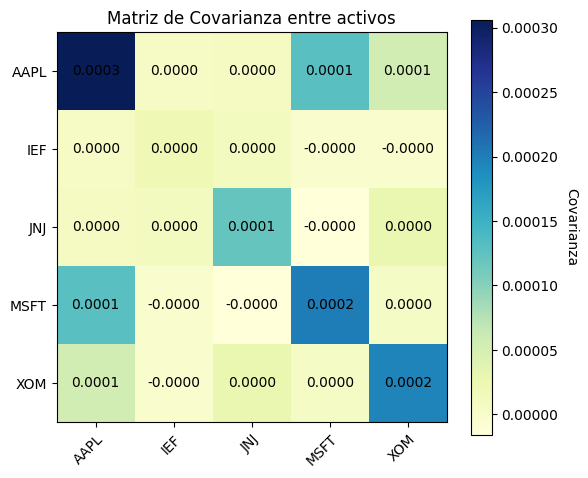

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Descargar precios
tickers = ["AAPL", "MSFT", "JNJ", "XOM", "IEF"]
px = yf.download(tickers, period="2y", auto_adjust=True)["Close"].dropna()

# Rendimientos diarios
ret = px.pct_change().dropna()

# Matriz de covarianza
cov_matrix = ret.cov()

print("📊 Matriz de Covarianza:")
print(cov_matrix)

# Visualización como mapa de calor
fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(cov_matrix, cmap="YlGnBu")

# Etiquetas
ax.set_xticks(np.arange(len(cov_matrix.columns)))
ax.set_yticks(np.arange(len(cov_matrix.columns)))
ax.set_xticklabels(cov_matrix.columns)
ax.set_yticklabels(cov_matrix.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Valores en cada celda
for i in range(len(cov_matrix.columns)):
    for j in range(len(cov_matrix.columns)):
        text = ax.text(j, i, f"{cov_matrix.iloc[i, j]:.4f}",
                       ha="center", va="center", color="black")

# Barra de color
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Covarianza", rotation=-90, va="bottom")

ax.set_title("Matriz de Covarianza entre activos")
plt.tight_layout()
plt.show()

🔹 ¿Qué es la covarianza?

*	La covarianza mide cómo varían dos activos en conjunto.
*	Fórmula:$$
\text{Cov}(X,Y) = E[(X - \mu_X)(Y - \mu_Y)]$$
*	Valores:
	*	Positivos → cuando uno sube, el otro tiende a subir.
	*	Negativos → cuando uno sube, el otro tiende a bajar.
	*	Cercanos a 0 → no hay relación clara.

👉 A diferencia de la correlación (que está entre -1 y +1), la covarianza depende de la escala de los rendimientos (por eso ves números pequeños en torno a 0.0001).

⸻

🔹 Lectura de tu matriz

1.	Diagonal (varianzas)
*	Ejemplo: AAPL ≈ 0.0003, MSFT ≈ 0.0002, XOM ≈ 0.0002.
*	Son las varianzas de cada activo: indican qué tan volátiles son.
*	AAPL muestra la mayor varianza, es decir, más volatilidad en los rendimientos diarios.
2.	Covarianzas positivas
*	AAPL–MSFT ≈ 0.0001
*	XOM–MSFT ≈ 0.0000 – 0.0001
*	Esto implica que suelen moverse en la misma dirección, aunque no perfectamente.
3.	Covarianzas cercanas a cero
*	AAPL–IEF ≈ 0.0000
*	XOM–IEF ≈ -0.0000
*	Muestran que acciones y bonos no tienen relación fuerte en sus movimientos, lo cual ayuda a la diversificación.
4.	Covarianzas negativas (muy ligeras)
*	MSFT–IEF ≈ -0.0000
*	MSFT–JNJ ≈ -0.0000
*	Señalan que en algunos casos, cuando uno sube, el otro tiende a bajar levemente (aunque aquí son muy pequeñas, casi nulas).

⸻

🔹 Conclusión práctica

*	Diagonal = volatilidad propia (riesgo individual).
*	Fuera de la diagonal = relación conjunta (riesgo compartido).
*	Para construir portafolios:
*	Covarianza alta y positiva → activos se mueven parecidos → menos beneficio de diversificación.
*	Covarianza baja o negativa → activos independientes o contrarios → más diversificación y reducción de riesgo global.

En tu caso:

*	Tecnología (AAPL–MSFT) muestra la mayor covarianza positiva, como era de esperarse.
*	Bonos (IEF) presentan covarianza casi nula con todos → aportan protección.
*	Energía (XOM) y Salud (JNJ) también tienen covarianzas bajas con tech → útiles para balancear.

